In [8]:
from sympy import *
from sympy import Symbol, Poly,legendre
from sympy.physics.quantum import Bra,Ket

class GramSchmidt:
  def __init__(self, var, vectores):
    self.var = var
    self.vectores = vectores

  def inner_chevichev(self, v1, v2):
    return integrate((v1 * v2) * (sqrt(1 - (self.var)**2)) , (self.var, -1, 1))

  def inner_legendre(self, v1, v2):
    return integrate((v1 * v2), (self.var, -1, 1))

  def gram_schmidt_chevichev(self):
    """
    Aplica el algoritmo de Gram-Schmidt a los vectores.
    Retorno:
      Una lista de vectores ortogonales.
    """
    vectores_ortonormales = []
    for vector in self.vectores:
      proyeccion = 0
      for vector_ortonormal in vectores_ortonormales:
        #print(vector)
        #print(vector_ortonormal)
        proyeccion += (self.inner_chevichev(vector, vector_ortonormal) / self.inner_chevichev(vector_ortonormal, vector_ortonormal)) * vector_ortonormal
      vector_menos_proyeccion = (vector - proyeccion)
      #vector_ortonormal = vector_menos_proyeccion / (self.inner_chevichev(vector_menos_proyeccion, vector_menos_proyeccion))
      vectores_ortonormales.append(vector_menos_proyeccion)
    return vectores_ortonormales

  def gram_schmidt_legendre(self):
    """
    Aplica el algoritmo de Gram-Schmidt a los vectores.
    Retorno:
      Una lista de vectores ortogonales.
    """
    vectores_ortonormales = []
    for vector in self.vectores:
      proyeccion = 0
      for vector_ortonormal in vectores_ortonormales:
        #print(vector)
        #print(vector_ortonormal)
        proyeccion += (self.inner_legendre(vector, vector_ortonormal) / self.inner_legendre(vector_ortonormal, vector_ortonormal)) * vector_ortonormal
      vector_menos_proyeccion = (vector - proyeccion)
      #vector_ortonormal = vector_menos_proyeccion / (self.inner_legendre(vector_menos_proyeccion, vector_menos_proyeccion))
      vectores_ortonormales.append(vector_menos_proyeccion)
    return vectores_ortonormales

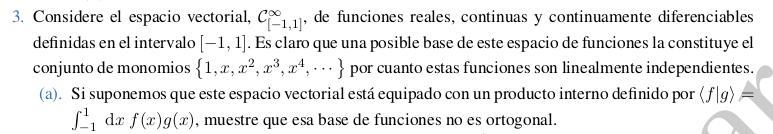

In [22]:
x = symbols('x')
i0 = 1
i1 = x
i2 = x**2
i3 = x**3
i4 = x**4
i5 = x**5
i6 = x**6
i7 = x**7
i8 = x**8
i9 = x**9
i10 = x**10
vectores = [i0,i1,i2,i3,i4]

for i in vectores:
    for j in vectores:
        b = Bra(i)
        k = Ket(j)
        print(b*k)
        v = gram_schmidt_inner.inner_legendre(i,j)
        print(v)

<1|1>
2
<1|x>
0
<1|x**2>
2/3
<1|x**3>
0
<1|x**4>
2/5
<x|1>
0
<x|x>
2/3
<x|x**2>
0
<x|x**3>
2/5
<x|x**4>
0
<x**2|1>
2/3
<x**2|x>
0
<x**2|x**2>
2/5
<x**2|x**3>
0
<x**2|x**4>
2/7
<x**3|1>
0
<x**3|x>
2/5
<x**3|x**2>
0
<x**3|x**3>
2/7
<x**3|x**4>
0
<x**4|1>
2/5
<x**4|x>
0
<x**4|x**2>
2/7
<x**4|x**3>
0
<x**4|x**4>
2/9


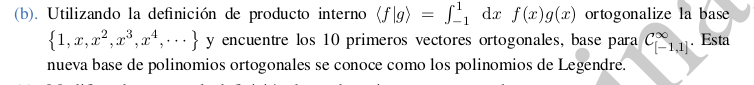

In [23]:
vectores = [i0,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10]
var = Symbol('x')
print('Primeros 10 polinomios legendre')
gram_schmidt_inner = GramSchmidt(var, vectores)
vector_ortogormales = gram_schmidt_inner.gram_schmidt_legendre()

for vector_ortogormal in vector_ortogormales:
  print((factor(vector_ortogormal)))

Primeros 10 polinomios legendre
1
x
(3*x**2 - 1)/3
x*(5*x**2 - 3)/5
(35*x**4 - 30*x**2 + 3)/35
x*(63*x**4 - 70*x**2 + 15)/63
(231*x**6 - 315*x**4 + 105*x**2 - 5)/231
x*(429*x**6 - 693*x**4 + 315*x**2 - 35)/429
(6435*x**8 - 12012*x**6 + 6930*x**4 - 1260*x**2 + 35)/6435
x*(12155*x**8 - 25740*x**6 + 18018*x**4 - 4620*x**2 + 315)/12155
(46189*x**10 - 109395*x**8 + 90090*x**6 - 30030*x**4 + 3465*x**2 - 63)/46189


In [26]:
print('Primeros 10 polinomios chevichev_second_kind: ')
vectores = [i0,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10]
var = Symbol('x')
gram_schmidt_inner = GramSchmidt(var, vectores)
vector_ortogormales = gram_schmidt_inner.gram_schmidt_chevichev()

for vector_ortogormal in vector_ortogormales:
  print(factor(factor(vector_ortogormal)))

Primeros 10 polinomios chevichev_second_kind: 
1
x
(2*x - 1)*(2*x + 1)/4
x*(2*x**2 - 1)/2
(4*x**2 - 2*x - 1)*(4*x**2 + 2*x - 1)/16
x*(2*x - 1)*(2*x + 1)*(4*x**2 - 3)/16
(8*x**3 - 4*x**2 - 4*x + 1)*(8*x**3 + 4*x**2 - 4*x - 1)/64
x*(2*x**2 - 1)*(8*x**4 - 8*x**2 + 1)/16
(2*x - 1)*(2*x + 1)*(8*x**3 - 6*x - 1)*(8*x**3 - 6*x + 1)/256
x*(4*x**2 - 2*x - 1)*(4*x**2 + 2*x - 1)*(16*x**4 - 20*x**2 + 5)/256
(32*x**5 - 16*x**4 - 32*x**3 + 12*x**2 + 6*x - 1)*(32*x**5 + 16*x**4 - 32*x**3 - 12*x**2 + 6*x + 1)/1024


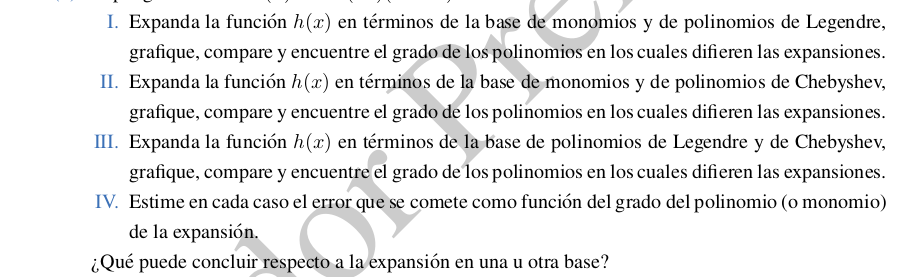